# Basic Data Understanding

## 1. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from src.plot import Plot
ploter = Plot()


## 2. Look at the structure

In [2]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')
df.head(5)

C:\Users\PC\AppData\Local\Temp\ipykernel_5176\3049884138.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 3. Data Understanding & Quality Assessment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
threshold = 0.8
df = df[df.columns[df.isnull().mean() < threshold]]
num_columns = df.select_dtypes(include='number').columns
df[num_columns] = df[num_columns].fillna(df[num_columns].median())
cat_columns = df.select_dtypes(include='object').columns
df['Gender'] = df['Gender'].fillna('Not specified')
df[cat_columns] = df[cat_columns].fillna('Unknown')
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

## 4. Descriptive Statistics

In [5]:
df.describe(include='number')

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,2.212193e+05,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,2.650521e+05,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,2.200000e+05,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.200000e+05,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.200000e+05,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,2.655000e+07,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [6]:
df.describe(include='object')

,TransactionMonth,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,...,Converted,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
count,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,23,4,6,5,1,12,4,4,3,1,...,3,2,13,28,22,14,5,4,1,1
top,2015-08-01 00:00:00,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,Unknown,Monthly,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
freq,106747,895210,911929,933555,1000098,260811,597938,986208,950526,1000098,...,641901,999554,791235,104158,104183,824124,828125,915028,1000098,1000098


### Convert Data Types

In [4]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['RegistrationYear'] = pd.to_numeric(df['RegistrationYear'], errors='coerce')

## 5. Loss Ratio (LR) Analysis

In [5]:
overall_lr = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"\nOverall Portfolio Loss Ratio: {overall_lr:.2f}")

## Loss Ratio by Key Segments
def calculate_lr(group):
    """Calculates Loss Ratio for a grouped series."""
    return group['TotalClaims'].sum() / group['TotalPremium'].sum()

# LR by Province
lr_by_province = df.groupby('Province').apply(calculate_lr).sort_values(ascending=False).rename('LossRatio')
print("\n--- LR by Province ---")
print(lr_by_province)

# LR by VehicleType
lr_by_vehicletype = df.groupby('VehicleType').apply(calculate_lr).sort_values(ascending=False).rename('LossRatio')
print("\n--- LR by VehicleType ---")
print(lr_by_vehicletype)


Overall Portfolio Loss Ratio: 1.05


C:\Users\PC\AppData\Local\Temp\ipykernel_5176\1008719507.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lr_by_province = df.groupby('Province').apply(calculate_lr).sort_values(ascending=False).rename('LossRatio')



--- LR by Province ---
Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
Name: LossRatio, dtype: float64

--- LR by VehicleType ---
VehicleType
Heavy Commercial     1.628112
Medium Commercial    1.050251
Passenger Vehicle    1.048198
Unknown              0.981618
Light Commercial     0.232066
Bus                  0.137292
Name: LossRatio, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_5176\1008719507.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lr_by_vehicletype = df.groupby('VehicleType').apply(calculate_lr).sort_values(ascending=False).rename('LossRatio')


## 6. Correlation Between Premium & Claims

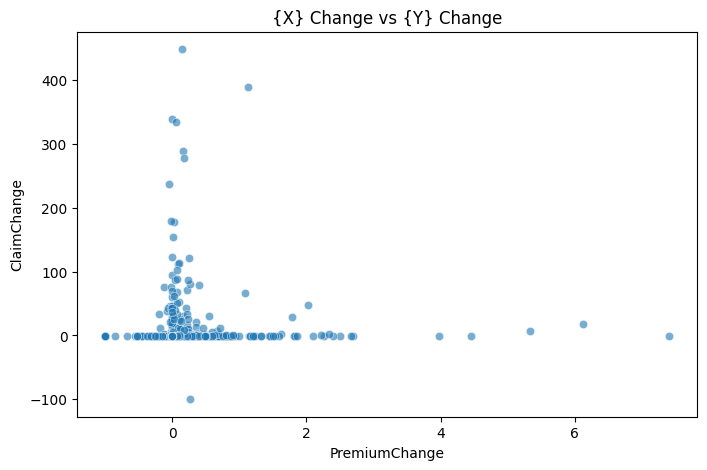

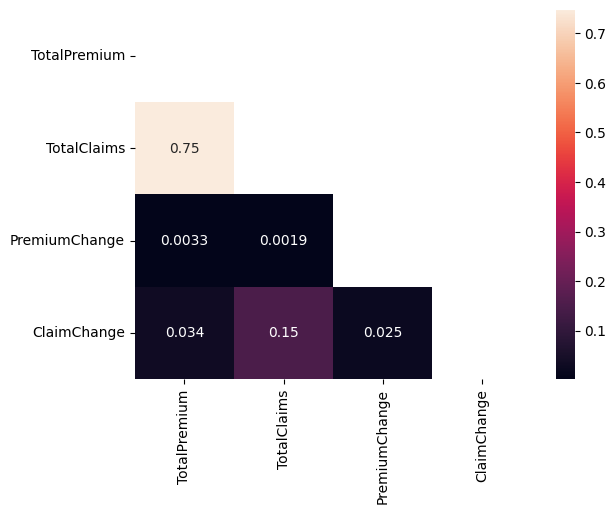

In [6]:
# Create Month column
df['Month'] = df['TransactionMonth'].dt.to_period('M').astype(str)

# Aggregate by ZipCode + Month
zip_monthly = df.groupby(['PostalCode', 'Month']).agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum')
).reset_index()

# Month-over-Month changes
zip_monthly = zip_monthly.sort_values(['PostalCode', 'Month'])
zip_monthly['PremiumChange'] = zip_monthly.groupby('PostalCode')['TotalPremium'].pct_change()
zip_monthly['ClaimChange'] = zip_monthly.groupby('PostalCode')['TotalClaims'].pct_change()

# Scatter plot
ploter.scatter_plot(zip_monthly,'PremiumChange','ClaimChange')


# Correlation matrix + heatmap
corr = zip_monthly[['TotalPremium','TotalClaims','PremiumChange','ClaimChange']].corr()

ploter.heat_plot(corr)

## 7. Univariate Analysis for Numerical Data

c:\Users\PC\Documents\insurance-risk-analytics\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


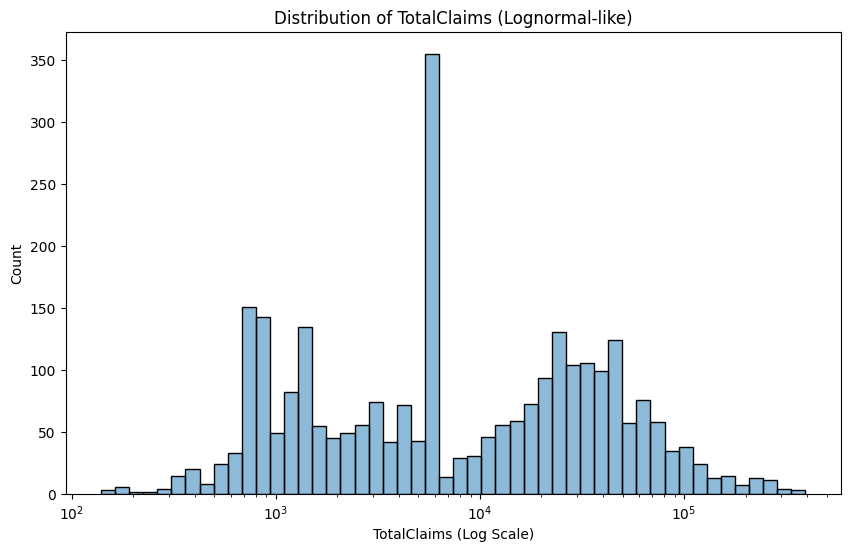

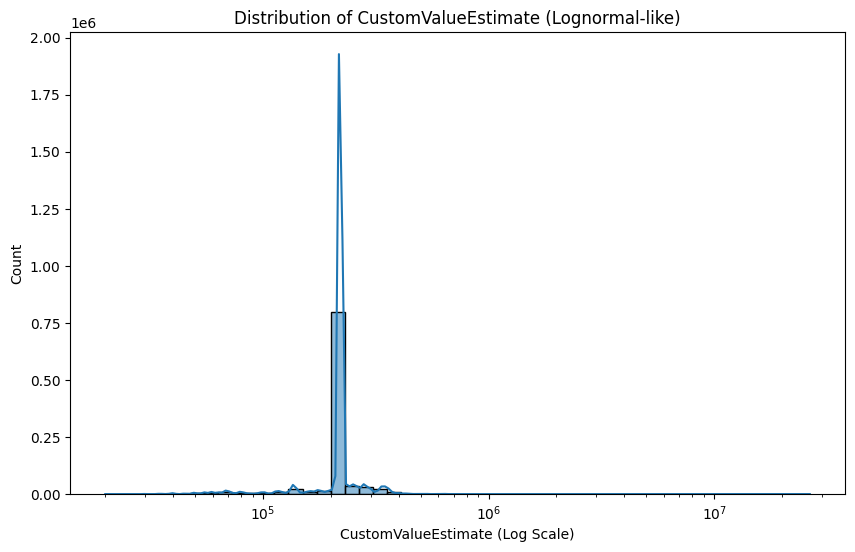

In [13]:

columns = ['TotalClaims', 'CustomValueEstimate']
for col in columns:
    ploter.univariate_numerical(df, col)

## 8. Univariate Analysis for Categorical Data

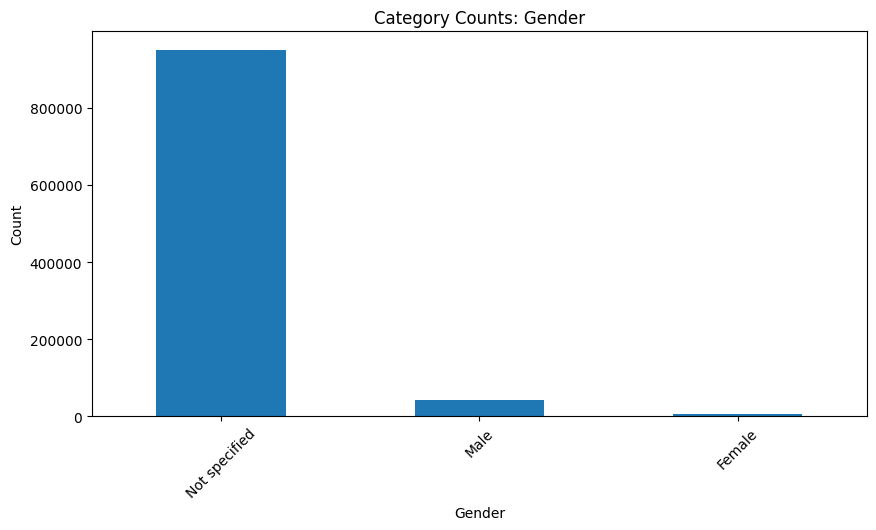

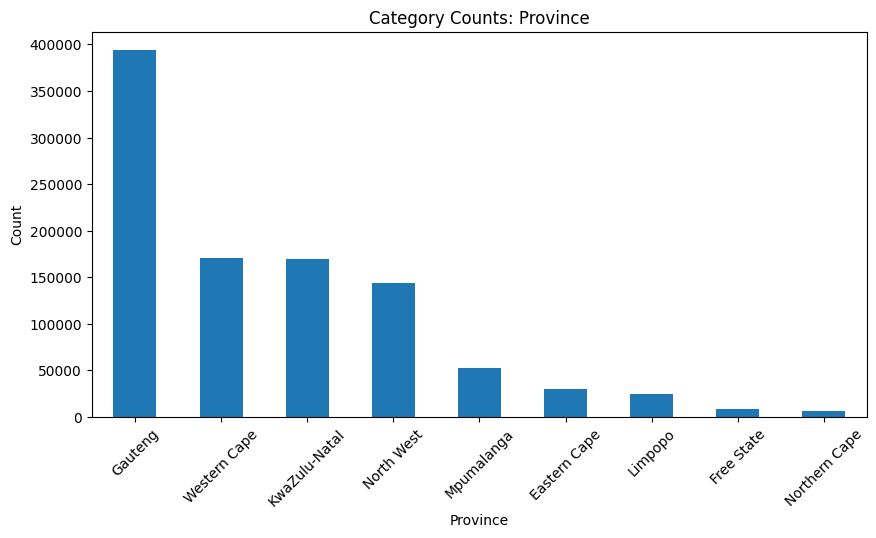

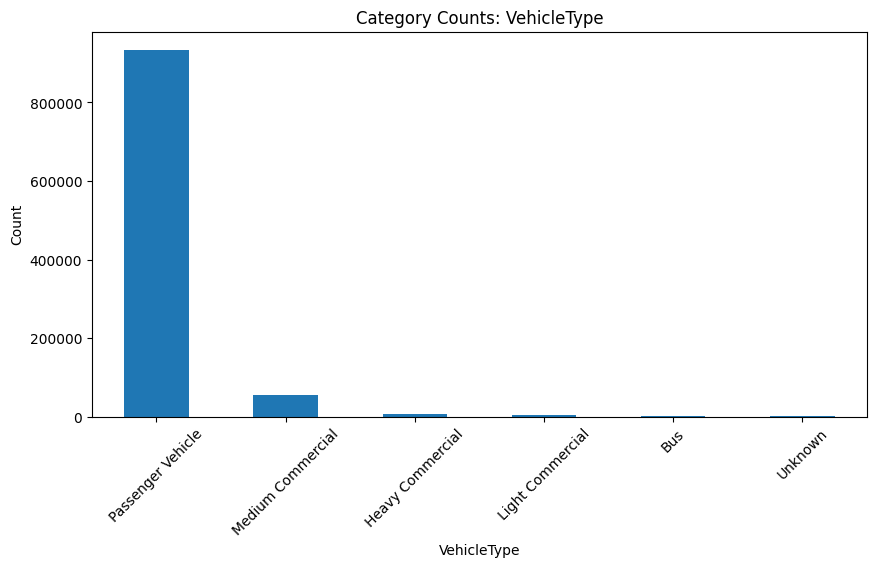

In [9]:
categorical_cols=df[['Gender', 'Province', 'VehicleType']]
for col in categorical_cols:
    ploter.univariate_categorical(df, col)


## 9.OUtlier Detaction

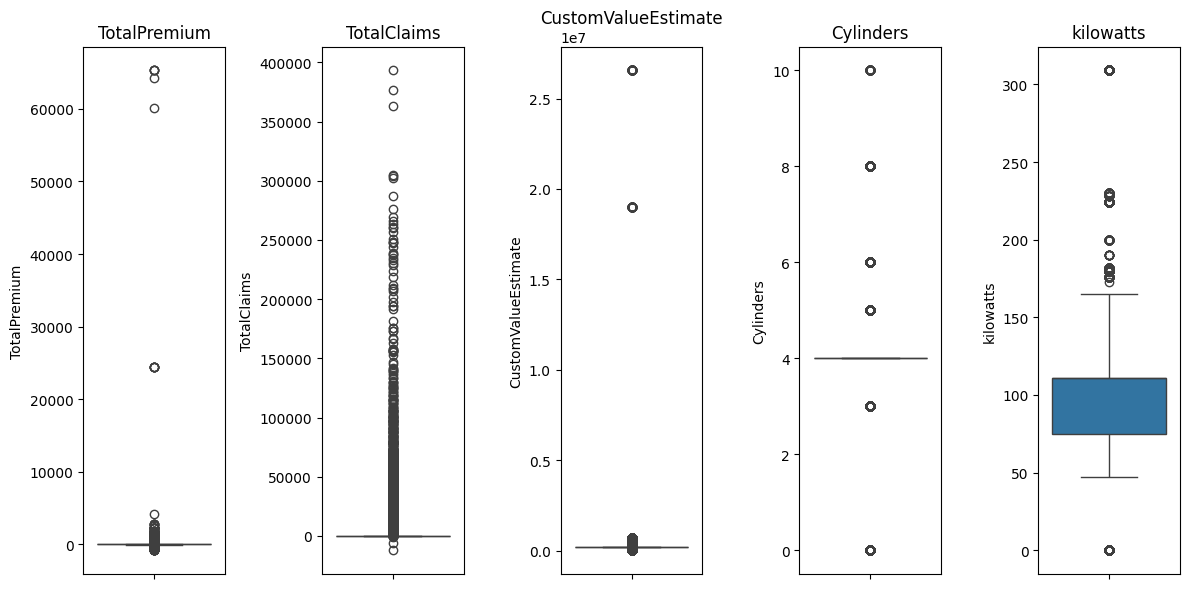

In [12]:
numeric_columns = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'Cylinders', 'kilowatts']

ploter.box_plot(numeric_columns, df)

In [ ]:
q_high = df['TotalClaims'].quantile(0.99)
outliers = df[df['TotalClaims']>q_high]
print(f"\nNumber of claims above 99th percentile ({q_high}): {len(outliers)}")
df['TotalClaims'].value_counts().head(10)


Number of claims above 99th percentile (0.0): 2788


TotalClaims
0.000000        997305
6140.350877        326
750.649123         101
1300.000000         59
850.000000          51
877.192982          45
43859.649123        41
1150.000000         31
3070.175439         28
815.789474          24
Name: count, dtype: int64

## 10. Temporal Trends (Time Series)

C:\Users\PC\AppData\Local\Temp\ipykernel_18172\472124242.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_data['Month'].astype(str), rotation=45)


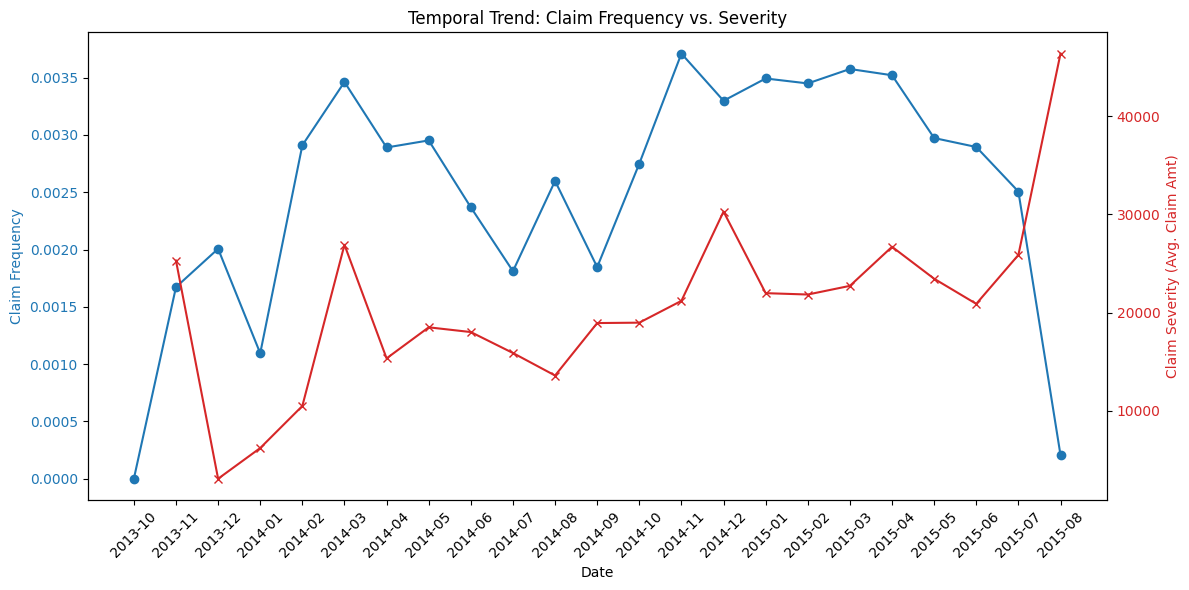

In [ ]:
df['Month'] = df['TransactionMonth'].dt.to_period('M').astype(str)
monthly_data = df.groupby('Month').agg(
    totalClaims=('TotalClaims', 'sum'),
    totalPremium=('TotalPremium', 'sum'),
    claimCount=('TotalClaims', lambda x: (x>0).sum()),
    policyCount=('PolicyID', 'count')
).reset_index()
monthly_data['ClaimFrequency'] = monthly_data['claimCount'] / monthly_data['policyCount']
monthly_data['ClaimSeverity'] = monthly_data['totalClaims'] / monthly_data['claimCount']

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Claim Frequency', color=color)
ax1.plot(monthly_data['Month'].astype(str), monthly_data['ClaimFrequency'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(monthly_data['Month'].astype(str), rotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Claim Severity (Avg. Claim Amt)', color=color)
ax2.plot(monthly_data['Month'].astype(str), monthly_data['ClaimSeverity'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Temporal Trend: Claim Frequency vs. Severity')
fig.tight_layout() 
plt.show()


## 11. Vehicle Make/Model Analysis

In [ ]:
df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10)


make
Unknown                                1008.489085
SUZUKI                                  419.634546
JMC                                     191.684795
HYUNDAI                                 174.215195
MARCOPOLO                               156.794806
AUDI                                    137.843083
POLARSUN                                134.044800
B.A.W                                   132.934016
FIAT                                    108.625642
BMW                                      90.558050
Name: TotalClaims, dtype: float64

## 12.Trends Over Geography

In [ ]:
# Total Premium by Province
prov_premium = df.groupby('Province')['TotalPremium'].sum().sort_values(ascending=False)

# Count of CoverType by Province
prov_cover = df.groupby(['Province','CoverType']).size().unstack(fill_value=0)

# Count of Vehicle Makes by Province_
prov_make = df.groupby(['Province','make']).size().unstack(fill_value=0)
prov_make

make,AUDI,B.A.W,BMW,C.A.M,CHERY,CHEVROLET,CITROEN,CMC,DAIHATSU,FIAT,...,RENAULT,SAIC,SCANIA,SUZUKI,TATA,TOYOTA,TOYOTA,Unknown,VOLKSWAGEN,VOLVO
Province,,,,,,,,,,,,,,,,,,,,,
Eastern Cape,0,135,0,77,0,90,0,620,0,0,...,0,81,0,0,0,26582,72,0,450,0
Free State,0,0,108,135,0,0,0,167,0,0,...,0,0,0,0,0,6566,0,0,146,0
Gauteng,6173,230,3821,8408,280,652,561,9141,0,205,...,90,282,0,271,100,306045,816,240,8775,207
KwaZulu-Natal,539,773,0,1216,0,80,0,2353,0,0,...,0,0,0,136,80,153241,80,0,3710,0
Limpopo,0,176,0,278,0,0,0,305,0,88,...,0,0,0,0,0,18076,0,0,1678,0
Mpumalanga,0,0,0,1496,0,0,0,1776,0,0,...,0,0,342,0,0,41589,80,80,1635,0
North West,371,344,4,4501,81,90,0,5800,1,0,...,1,170,0,1,199,108035,1,0,2045,1
Northern Cape,0,0,0,0,0,0,0,863,0,0,...,0,0,0,0,0,4928,0,0,108,0
Western Cape,324,502,1384,60,0,0,0,599,0,691,...,65,81,0,0,2,148218,117,232,2382,108
